Training data loaded successfully
Epoch 0, Loss: 54437556811.8587
Epoch 50, Loss: 12554518264.745586
Epoch 100, Loss: 6784075935.815006
Epoch 150, Loss: 5864329170.3052845
Epoch 200, Loss: 5622770408.578464
Epoch 250, Loss: 5492506212.418884
Epoch 300, Loss: 5392934489.377067
Epoch 350, Loss: 5310324846.687943
Epoch 400, Loss: 5240659042.755667
Epoch 450, Loss: 5181652850.570492


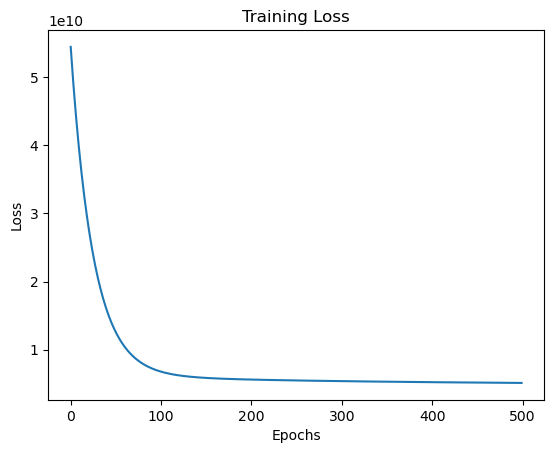

Final weights: [-43389.91586301 -48708.00634478  20378.87472581  -5319.22073177
  22583.84261262 -32486.10912354  22642.14301013  79222.13459038]
Final bias: 207292.40804339194
Test data loaded successfully
Test Loss: 5149291502.425005


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate Mean Squared Error Loss
def loss(y_pred, y_true):
    return np.mean((y_pred - y_true) ** 2)

# Function to calculate the predictions for input X
def y_prediction(a, x, b):
    return np.dot(x, a) + b

# Function to calculate gradients for weights (a) and bias (b)
def gradient(a, x, b, y_true):
    n = x.shape[0]  # Number of samples
    y_pred = y_prediction(a, x, b)
    # Compute gradients
    da = (-2 / n) * np.dot(x.T, (y_true - y_pred))  # Gradient for weights
    db = (-2 / n) * np.sum(y_true - y_pred)        # Gradient for bias
    return da, db

# Function to perform Gradient Descent and optimize weights
def gradient_descent(x, y_true, learning_rate, epochs):
    a = np.zeros(x.shape[1])  # Initialize weights
    b = 0.0                   # Initialize bias
    train_loss = []

    # Iterate for the number of epochs
    for epoch in range(epochs):
        da, db = gradient(a, x, b, y_true)  # Compute gradients
        a -= learning_rate * da
        b -= learning_rate * db
        # Calculate and store loss
        y_pred = y_prediction(a, x, b)
        current_loss = loss(y_pred, y_true)
        train_loss.append(current_loss)
        if epoch % 50 == 0:
            print(f"Epoch {epoch}, Loss: {current_loss}")
    
    return a, b, train_loss

# Load and preprocess the data
def load_and_preprocess_data(filepath):
    # Load the dataset
    df = pd.read_csv(filepath)
    # Separate features (X) and target (y)
    X = df.drop(columns=['median_house_value'])  # All columns except the target
    y = df['median_house_value']
    # Normalize the features
    X = (X - X.mean()) / X.std()
    return X.values, y.values  # Return as numpy arrays

# Main Execution
if __name__ == "__main__":
    # Hyperparameters
    learning_rate = 0.01
    epochs = 500

    # Load training data
    train_file = 'california_housing_train.csv'
    X_train, y_train = load_and_preprocess_data(train_file)
    print("Training data loaded successfully")

    # Train the Linear Regression model
    weights, bias, train_loss = gradient_descent(X_train, y_train, learning_rate, epochs)

    # Plot the training loss
    plt.plot([i for i in range(epochs)], train_loss)
    plt.title("Training Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()

    print(f"Final weights: {weights}")
    print(f"Final bias: {bias}")

    # Load test data
    test_file = 'california_housing_test.csv'
    X_test, y_test = load_and_preprocess_data(test_file)
    print("Test data loaded successfully")

    # Evaluate on test data
    y_test_pred = y_prediction(weights, X_test, bias)
    test_loss = loss(y_test_pred, y_test)
    print(f"Test Loss: {test_loss}")
